In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from coinapi_rest_v1.restapi import CoinAPIv1
import config
import datetime

In [2]:
#Initializing Coin API module
c_api = CoinAPIv1(api_key=config.api_key)

In [3]:
#Date Range for data retrieval
start_date = datetime.date(2022, 4, 28).isoformat()
end_date = datetime.date(2024, 4, 29).isoformat()

In [4]:
#Selected coin tickers
coins = ['BTC', 'ETH', 'HBAR']
portfolio = pd.DataFrame()

In [5]:
#Fetching the data
for coin in coins:
    df = pd.DataFrame(c_api.ohlcv_historical_data(
            f'BITSTAMP_SPOT_{coin}_USD', 
            {
                'period_id': '1DAY', 
                'time_start': start_date, 
                'end_date': end_date,
                'limit': 1000
            }
        ))
    
    df['daily_return'] = df.price_close.pct_change()
    df.dropna(axis=0, inplace=True)
    
    if len(list(portfolio.index)) == 0:
        portfolio.index = pd.to_datetime(df['time_period_start']).dt.date
        portfolio.index.name = 'date'
        
    portfolio[coin] = np.array(df['daily_return'])

In [6]:
#Summary statistics for the portfolio
portfolio.describe()

,BTC,ETH,HBAR
count,731.000000,731.000000,731.000000
mean,0.000901,0.000616,0.000549
std,0.028617,0.035837,0.053029
min,-0.155526,-0.175761,-0.198369
25%,-0.010380,-0.014467,-0.025316
50%,-0.000347,-0.000328,-0.001181
75%,0.013676,0.016019,0.021234
max,0.106045,0.181117,0.724264


In [7]:
#Calculating the correlation among assets
correlation_matrix = portfolio.corr()
correlation_matrix

,BTC,ETH,HBAR
BTC,1.000000,0.854399,0.553291
ETH,0.854399,1.000000,0.556716
HBAR,0.553291,0.556716,1.000000


In [8]:
#Calculating the covariance among assets
covariance_matrix = portfolio.cov()
covariance_matrix

,BTC,ETH,HBAR
BTC,0.000819,0.000876,0.000840
ETH,0.000876,0.001284,0.001058
HBAR,0.000840,0.001058,0.002812


# Visualizing the distribution of daily returns

## 1) Bitcoin (BTC)

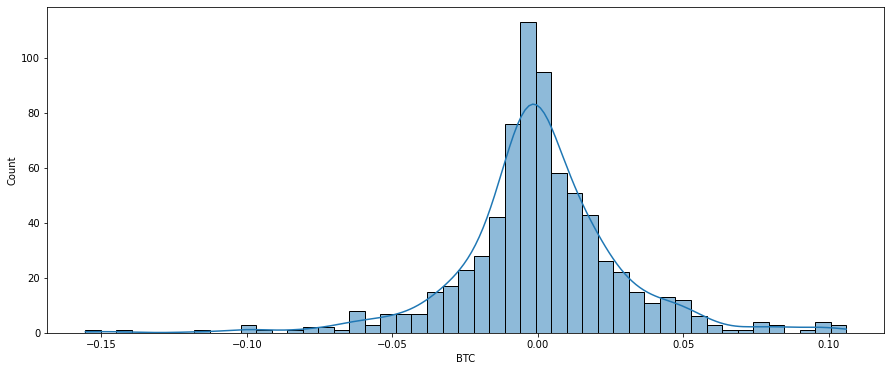

In [9]:
plt.figure(figsize=(15,6))
sns.histplot(portfolio.BTC, kde=True);

## 2) Ethereum (ETH)

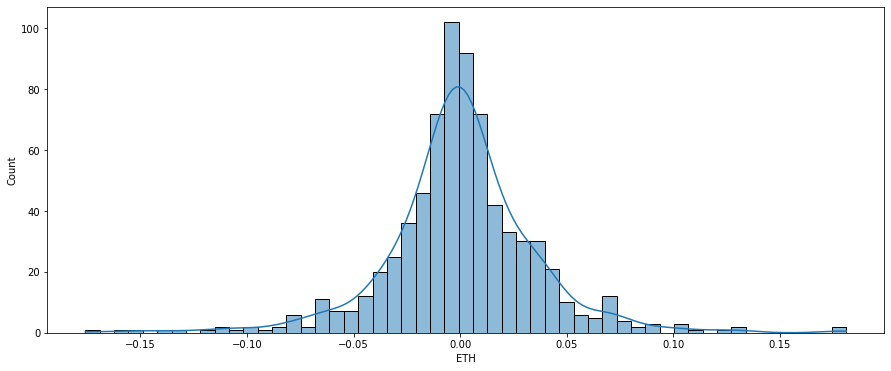

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(portfolio.ETH, kde=True);

## 3) Hedera (HBAR)

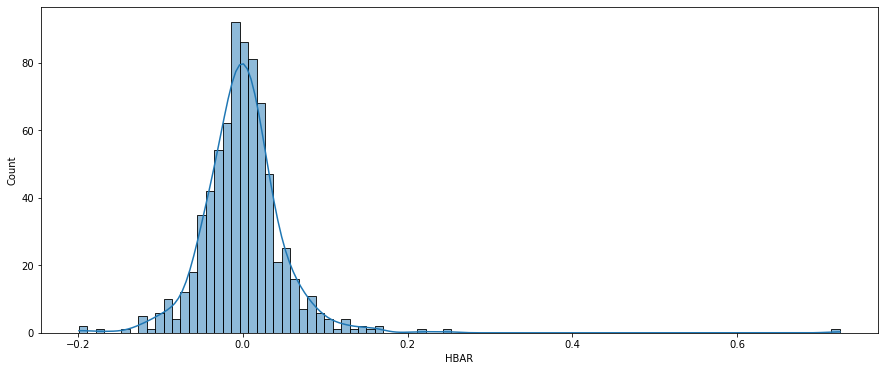

In [11]:
plt.figure(figsize=(15,6))
sns.histplot(portfolio.HBAR, kde=True);

# Calculating Portfolio's Statistics

In [12]:
#Choosing weights for the portfolio
weights = [0.5, 0.35, 0.15]

In [13]:
#Calculating the Portfolio's return
portfolio['Portfolio'] = portfolio['BTC'] * weights[0] + portfolio['ETH'] * weights[1] + portfolio['HBAR'] * weights[2] 

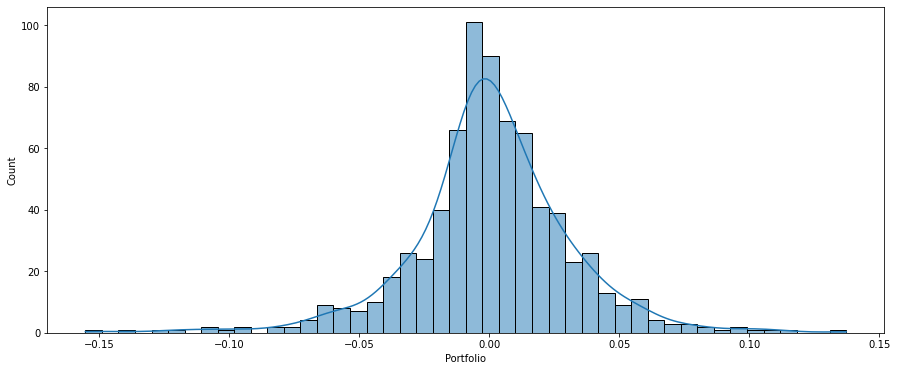

In [14]:
#Visualizing the Portfolio's distribution of returns
plt.figure(figsize=(15,6))
sns.histplot(portfolio.Portfolio, kde=True);

In [15]:
#Calculating average returns, volatility, skewness and kurtosis
columns = ['BTC', 'ETH', 'HBAR', 'Portfolio']
index = ['Average Returns', 'Standard Deviation', 'Skewness', 'Kurtosis']
portfolio_metrics = pd.DataFrame(index=index, columns=columns)
for column in columns:
    portfolio_metrics.loc['Average Returns', column] = portfolio[column].mean()
    portfolio_metrics.loc['Standard Deviation', column] = portfolio[column].std()
    portfolio_metrics.loc['Skewness', column] = portfolio[column].skew()
    portfolio_metrics.loc['Kurtosis', column] = portfolio[column].kurtosis()

In [16]:
portfolio_metrics

,BTC,ETH,HBAR,Portfolio
Average Returns,0.000901,0.000616,0.000549,0.000748
Standard Deviation,0.028617,0.035837,0.053029,0.03113
Skewness,-0.244365,-0.045575,3.651567,-0.318828
Kurtosis,4.154866,4.363514,48.453571,3.341513


## Saving a copy of the Data

In [17]:
#saving an offline copy of the fetched data
portfolio.to_csv('btc_eth_hbar.csv', index=False)
#saving a copy of correlation matrix
correlation_matrix.to_csv('correlation_matrix.csv', index=False)
#saving a copy of covariance matrix
covariance_matrix.to_csv('covariance_matrix.csv', index=False)
#saving a copy of the portfolio metrics
portfolio_metrics.to_csv('portfolio_metrics.csv', index=False)